In [85]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('kospi.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,2183.489990,2206.199951,2177.879883,2206.199951,2206.199951,480400
1,2019-01-31,2222.879883,2222.879883,2201.219971,2204.850098,2204.850098,545200
2,2019-02-01,2211.929932,2218.780029,2201.409912,2203.459961,2203.459961,479400
3,2019-02-07,2215.770020,2215.790039,2196.770020,2203.419922,2203.419922,427800
4,2019-02-08,2192.010010,2192.479980,2171.959961,2177.050049,2177.050049,391000
...,...,...,...,...,...,...,...
426,2020-10-26,2366.500000,2374.500000,2342.580078,2343.909912,2343.909912,822300
427,2020-10-27,2328.659912,2349.330078,2321.229980,2330.840088,2330.840088,666900
428,2020-10-28,2324.179932,2345.459961,2316.469971,2345.260010,2345.260010,705200
429,2020-10-29,2312.340088,2330.169922,2299.909912,2326.669922,2326.669922,509100


In [82]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       431 non-null    object 
 1   Open       431 non-null    float64
 2   High       431 non-null    float64
 3   Low        431 non-null    float64
 4   Close      431 non-null    float64
 5   Adj Close  431 non-null    float64
 6   Volume     431 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 23.7+ KB


In [84]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,431.000000,431.000000,431.000000,431.000000,431.000000,4.310000e+02
mean,2122.449765,2134.756032,2106.976497,2121.195427,2121.195427,6.482257e+05
std,159.523899,155.808986,161.926432,159.038127,159.038127,2.593637e+05
min,1474.449951,1516.750000,1439.430054,1457.640015,1457.640015,0.000000e+00
25%,2057.589966,2065.619995,2041.244995,2055.299927,2055.299927,4.406500e+05
50%,2132.379883,2141.270020,2119.070068,2131.239990,2131.239990,6.087000e+05
75%,2211.449951,2220.595092,2196.599976,2209.244995,2209.244995,8.109500e+05
max,2455.280029,2458.169922,2429.939941,2443.580078,2443.580078,1.984200e+06


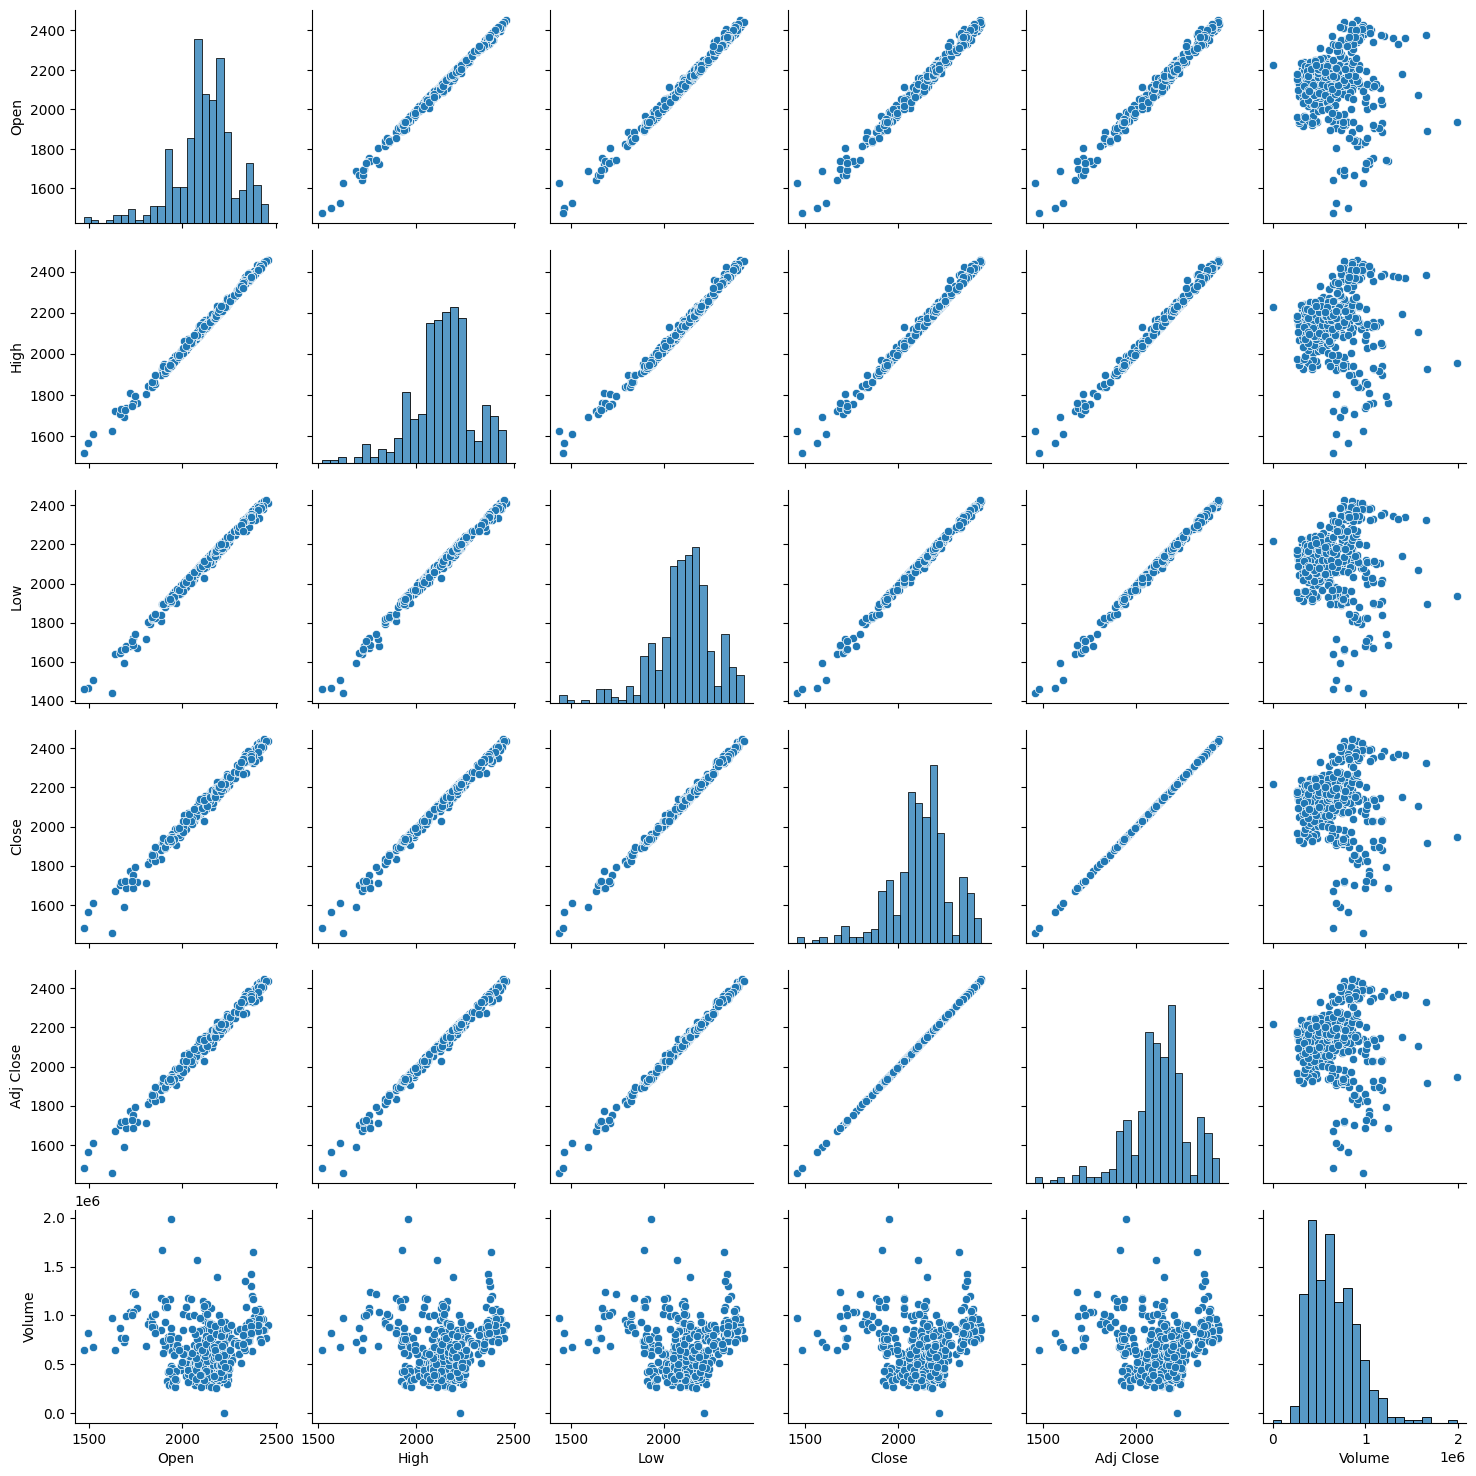

In [86]:
sns.pairplot(df)

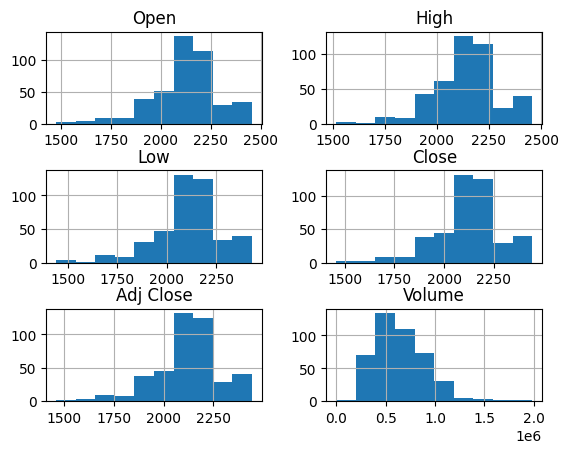

In [91]:
df.hist()
plt.subplots_adjust(hspace=0.5);

In [92]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [95]:
df[df['Close'] == df['Adj Close']].isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [96]:
scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

array([[0.72289794, 0.73235114, 0.74552494, 0.75923473, 0.24211269],
       [0.76305769, 0.75006898, 0.76908866, 0.75786563, 0.27477069],
       [0.75189373, 0.74571401, 0.76928042, 0.75645566, 0.24160871],
       ...,
       [0.86633761, 0.88027663, 0.88544287, 0.90027784, 0.35540772],
       [0.85426636, 0.86403517, 0.86872415, 0.88142265, 0.25657696],
       [0.86162744, 0.85344481, 0.83542819, 0.82105385, 0.40096008]])

In [97]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,2183.489990,2206.199951,2177.879883,2206.199951,2206.199951,480400
1,2019-01-31,2222.879883,2222.879883,2201.219971,2204.850098,2204.850098,545200
2,2019-02-01,2211.929932,2218.780029,2201.409912,2203.459961,2203.459961,479400
3,2019-02-07,2215.770020,2215.790039,2196.770020,2203.419922,2203.419922,427800
4,2019-02-08,2192.010010,2192.479980,2171.959961,2177.050049,2177.050049,391000


In [98]:
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])

In [99]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-30,0.722898,0.732351,0.745525,0.759235,2206.199951,0.242113
1,2019-01-31,0.763058,0.750069,0.769089,0.757866,2204.850098,0.274771
2,2019-02-01,0.751894,0.745714,0.769280,0.756456,2203.459961,0.241609
3,2019-02-07,0.755809,0.742538,0.764596,0.756415,2203.419922,0.215603
4,2019-02-08,0.731584,0.717777,0.739548,0.729669,2177.050049,0.197057


In [100]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [101]:
# Dataset
X = df[['Open','High','Low','Volume']].values
y = df['Close'].values

In [102]:
def seq_data(x, y, sequence_length):

    x_seq = []
    y_seq = []
    for i in range(len(x) - sequence_length):
        x_seq.append(x[i:i + sequence_length]) # a[2:6] -> 2,3,4,5
        y_seq.append(y[i + sequence_length])

    return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1, 1)

In [107]:
X, X.shape

(array([[0.72289794, 0.73235114, 0.74552494, 0.24211269],
        [0.76305769, 0.75006898, 0.76908866, 0.27477069],
        [0.75189373, 0.74571401, 0.76928042, 0.24160871],
        ...,
        [0.86633761, 0.88027663, 0.88544287, 0.35540772],
        [0.85426636, 0.86403517, 0.86872415, 0.25657696],
        [0.86162744, 0.85344481, 0.83542819, 0.40096008]]),
 (431, 4))

In [108]:
y.shape

(431,)

In [110]:
split = 200
sequence_length = 5

x_seq, y_seq = seq_data(X, y, sequence_length)

<ipython-input-102-d3257ed6f0a7>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1, 1)


In [115]:
X[:5]

array([[0.72289794, 0.73235114, 0.74552494, 0.24211269],
       [0.76305769, 0.75006898, 0.76908866, 0.27477069],
       [0.75189373, 0.74571401, 0.76928042, 0.24160871],
       [0.75580887, 0.74253797, 0.76459607, 0.21560327],
       [0.73158448, 0.71777744, 0.7395483 , 0.19705675]])

In [113]:
x_seq.shape, x_seq

(torch.Size([426, 5, 4]),
 tensor([[[0.7229, 0.7324, 0.7455, 0.2421],
          [0.7631, 0.7501, 0.7691, 0.2748],
          [0.7519, 0.7457, 0.7693, 0.2416],
          [0.7558, 0.7425, 0.7646, 0.2156],
          [0.7316, 0.7178, 0.7395, 0.1971]],
 
         [[0.7631, 0.7501, 0.7691, 0.2748],
          [0.7519, 0.7457, 0.7693, 0.2416],
          [0.7558, 0.7425, 0.7646, 0.2156],
          [0.7316, 0.7178, 0.7395, 0.1971],
          [0.7199, 0.7062, 0.7349, 0.2047]],
 
         [[0.7519, 0.7457, 0.7693, 0.2416],
          [0.7558, 0.7425, 0.7646, 0.2156],
          [0.7316, 0.7178, 0.7395, 0.1971],
          [0.7199, 0.7062, 0.7349, 0.2047],
          [0.7221, 0.7205, 0.7462, 0.2167]],
 
         ...,
 
         [[0.9059, 0.9082, 0.9257, 0.4084],
          [0.8984, 0.8960, 0.9089, 0.4102],
          [0.9078, 0.9048, 0.9137, 0.4487],
          [0.9095, 0.9111, 0.9118, 0.4144],
          [0.8709, 0.8844, 0.8902, 0.3361]],
 
         [[0.8984, 0.8960, 0.9089, 0.4102],
          [0.9078, 0.9

In [116]:
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

In [118]:
x_train_seq.shape, y_train_seq.shape, x_test_seq.shape, y_test_seq.shape

(torch.Size([200, 5, 4]),
 torch.Size([200, 1]),
 torch.Size([226, 5, 4]),
 torch.Size([226, 1]))

In [119]:
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

In [124]:
train, test

(<torch.utils.data.dataset.TensorDataset at 0x7ee62aa91ae0>,
 <torch.utils.data.dataset.TensorDataset at 0x7ee62aa92530>)

In [129]:
train.tensors[0].shape, train.tensors[1].shape,\
train.tensors[0][:2], train.tensors[1][:2]

(torch.Size([200, 5, 4]),
 torch.Size([200, 1]),
 tensor([[[0.7229, 0.7324, 0.7455, 0.2421],
          [0.7631, 0.7501, 0.7691, 0.2748],
          [0.7519, 0.7457, 0.7693, 0.2416],
          [0.7558, 0.7425, 0.7646, 0.2156],
          [0.7316, 0.7178, 0.7395, 0.1971]],
 
         [[0.7631, 0.7501, 0.7691, 0.2748],
          [0.7519, 0.7457, 0.7693, 0.2416],
          [0.7558, 0.7425, 0.7646, 0.2156],
          [0.7316, 0.7178, 0.7395, 0.1971],
          [0.7199, 0.7062, 0.7349, 0.2047]]]),
 tensor([[0.7334],
         [0.7433]]))

In [178]:
batch_size = 20
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [135]:
train_loader

In [138]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape

(torch.Size([20, 5, 4]), torch.Size([20, 1]))

In [142]:
next(iter(train_loader))[0][:5], next(iter(train_loader))[1][:5]

(tensor([[[0.7462, 0.7415, 0.7732, 0.2607],
          [0.7577, 0.7447, 0.7704, 0.1753],
          [0.7523, 0.7487, 0.7714, 0.2091],
          [0.7461, 0.7523, 0.7717, 0.2014],
          [0.7680, 0.7581, 0.7852, 0.2026]],
 
         [[0.6584, 0.6496, 0.6828, 0.3714],
          [0.6589, 0.6634, 0.6853, 0.3250],
          [0.6735, 0.6612, 0.6911, 0.2708],
          [0.6859, 0.6697, 0.6940, 0.2078],
          [0.6603, 0.6523, 0.6795, 0.2322]],
 
         [[0.4747, 0.4570, 0.5015, 0.3298],
          [0.4762, 0.4593, 0.4986, 0.2153],
          [0.4632, 0.4471, 0.4888, 0.3326],
          [0.4809, 0.4626, 0.5026, 0.3526],
          [0.4558, 0.4365, 0.4768, 0.2125]],
 
         [[0.5648, 0.5552, 0.5868, 0.2031],
          [0.5680, 0.5504, 0.5823, 0.1624],
          [0.5658, 0.5630, 0.5908, 0.2205],
          [0.5665, 0.5567, 0.5769, 0.2247],
          [0.5848, 0.5706, 0.6068, 0.1921]],
 
         [[0.7323, 0.7209, 0.7464, 0.1681],
          [0.6977, 0.6825, 0.7110, 0.1548],
          [0.6918, 0

In [145]:
x_seq.size(), x_seq.size(2)

(torch.Size([426, 5, 4]), 4)

In [146]:
# RNN
input_size = x_seq.size(2)
num_layers = 2
hidden_size = 8

In [179]:
class VanillaRNN(nn.Module):

    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(VanillaRNN, self).__init__()
        self.device =device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size*sequence_length, 1), nn.Sigmoid())

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 초기 hidden state 설정
        # print(h0, h0.shape)
        out, _ = self.rnn(x, h0) # out: RNN의 마지막 레이어로 부터 나온 output feature 반환, hn: hidden state 반환
        # print(out)
        out = out.reshape(out.shape[0], -1) # many to many 전략
        # print(out)
        out = self.fc(out)
        return out

In [180]:
model = VanillaRNN(input_size=input_size,
                   hidden_size=hidden_size,
                   sequence_length=sequence_length,
                   num_layers=num_layers,
                   device=device).to(device)

In [ ]:
#   [0., 0., 0., 0., 0., 0., 0., 0.],
#          [0., 0., 0., 0., 0., 0., 0., 0.]]]) torch.Size([2, 20, 8])

#   [-1.1112e-01,  9.3091e-03,  1.9444e-01,  3.7051e-01,  4.7340e-01,
#           -3.1852e-01,  8.3302e-02,  1.8329e-02]]],
#        grad_fn=<TransposeBackward1>)

#           3.7051e-01,  4.7340e-01, -3.1852e-01,  8.3302e-02,  1.8329e-02]],
#        grad_fn=<UnsafeViewBackward0>)

In [165]:
model

VanillaRNN(
  (rnn): RNN(4, 8, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=40, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [169]:
model.parameters

<bound method Module.parameters of VanillaRNN(
  (rnn): RNN(4, 8, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=40, out_features=1, bias=True)
    (1): Sigmoid()
  )
)>

In [181]:
criterion = nn.MSELoss()
num_epochs = 301
optimizer = optim.Adam(params=model.parameters(), lr=1e-4)

In [171]:
from tqdm import tqdm

In [182]:
loss_graph = []
n = len(train_loader)

for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0

    for data in train_loader:

        seq, target = data # 배치 데이터
        out = model(seq)
        loss = criterion(out, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_graph.append(running_loss/n)
    if epoch % 100 == 0:
        print('[epoch: %d] loss: %.4f' %(epoch, running_loss/n))

  2%|▏         | 6/301 [00:00<00:10, 29.07it/s]

[epoch: 0] loss: 0.0179


 35%|███▍      | 104/301 [00:03<00:06, 31.04it/s]

[epoch: 100] loss: 0.0049


 67%|██████▋   | 203/301 [00:07<00:04, 22.50it/s]

[epoch: 200] loss: 0.0013


100%|██████████| 301/301 [00:10<00:00, 28.62it/s]

[epoch: 300] loss: 0.0011


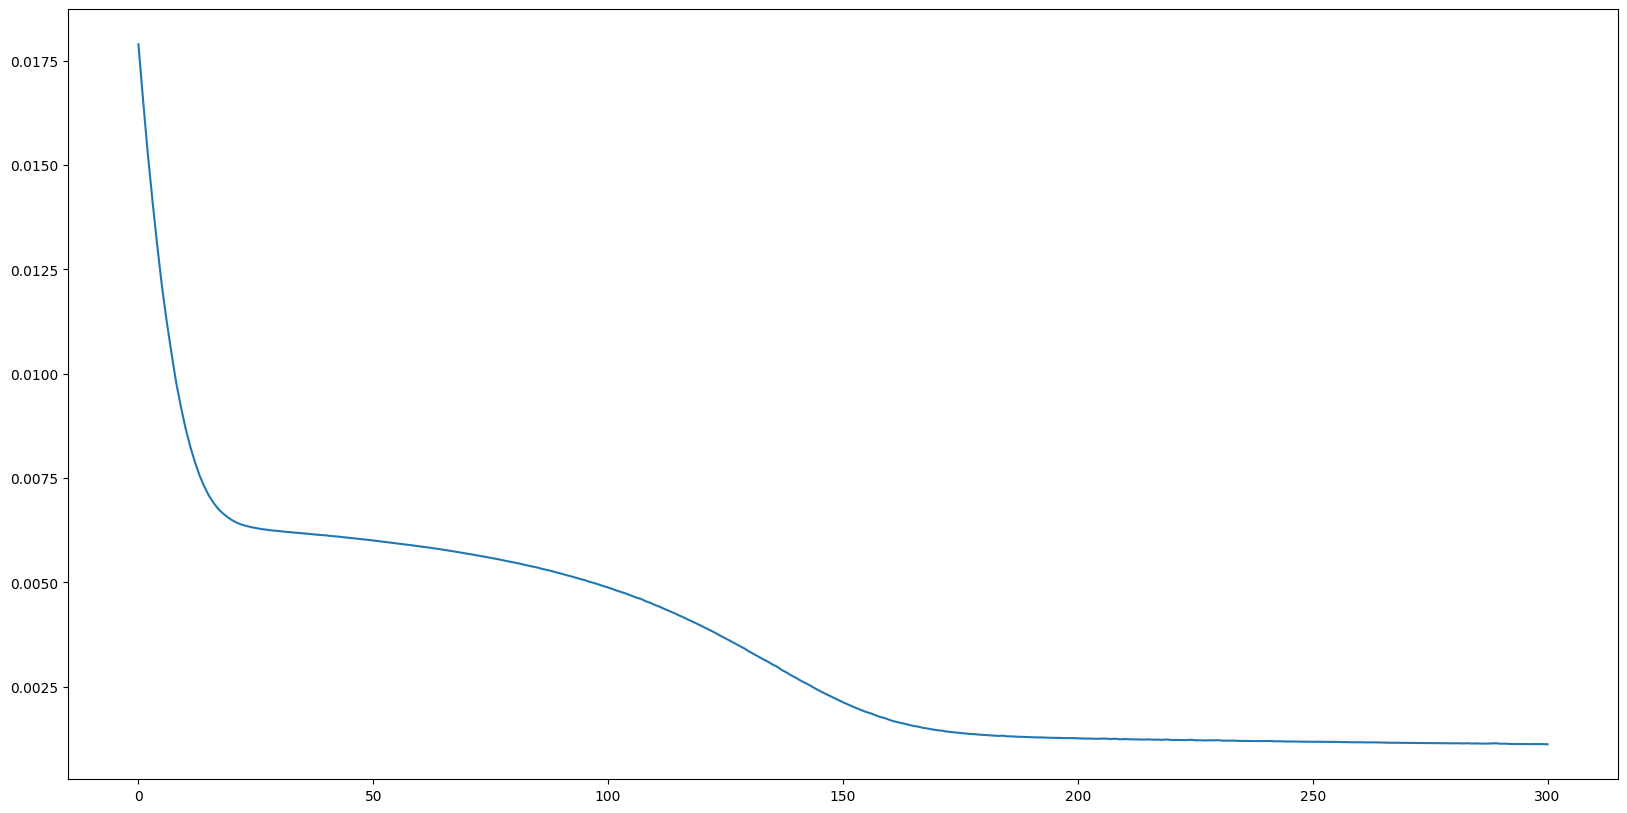

In [183]:
plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.show()

In [191]:
concatdata = torch.utils.data.ConcatDataset([train, test])
data_loader = torch.utils.data.DataLoader(dataset=concatdata, batch_size=100, shuffle=False)

In [189]:
next(iter(concatdata))[0].shape, next(iter(concatdata))[1].shape

(torch.Size([5, 4]), torch.Size([1]))

In [190]:
next(iter(data_loader))[0].shape, next(iter(data_loader))[1].shape

(torch.Size([100, 5, 4]), torch.Size([100, 1]))

In [192]:
with torch.no_grad():
    pred = []
    model.eval()
    for data in data_loader:
        seq, target = data
        out = model(seq)
        pred += out.cpu().tolist()

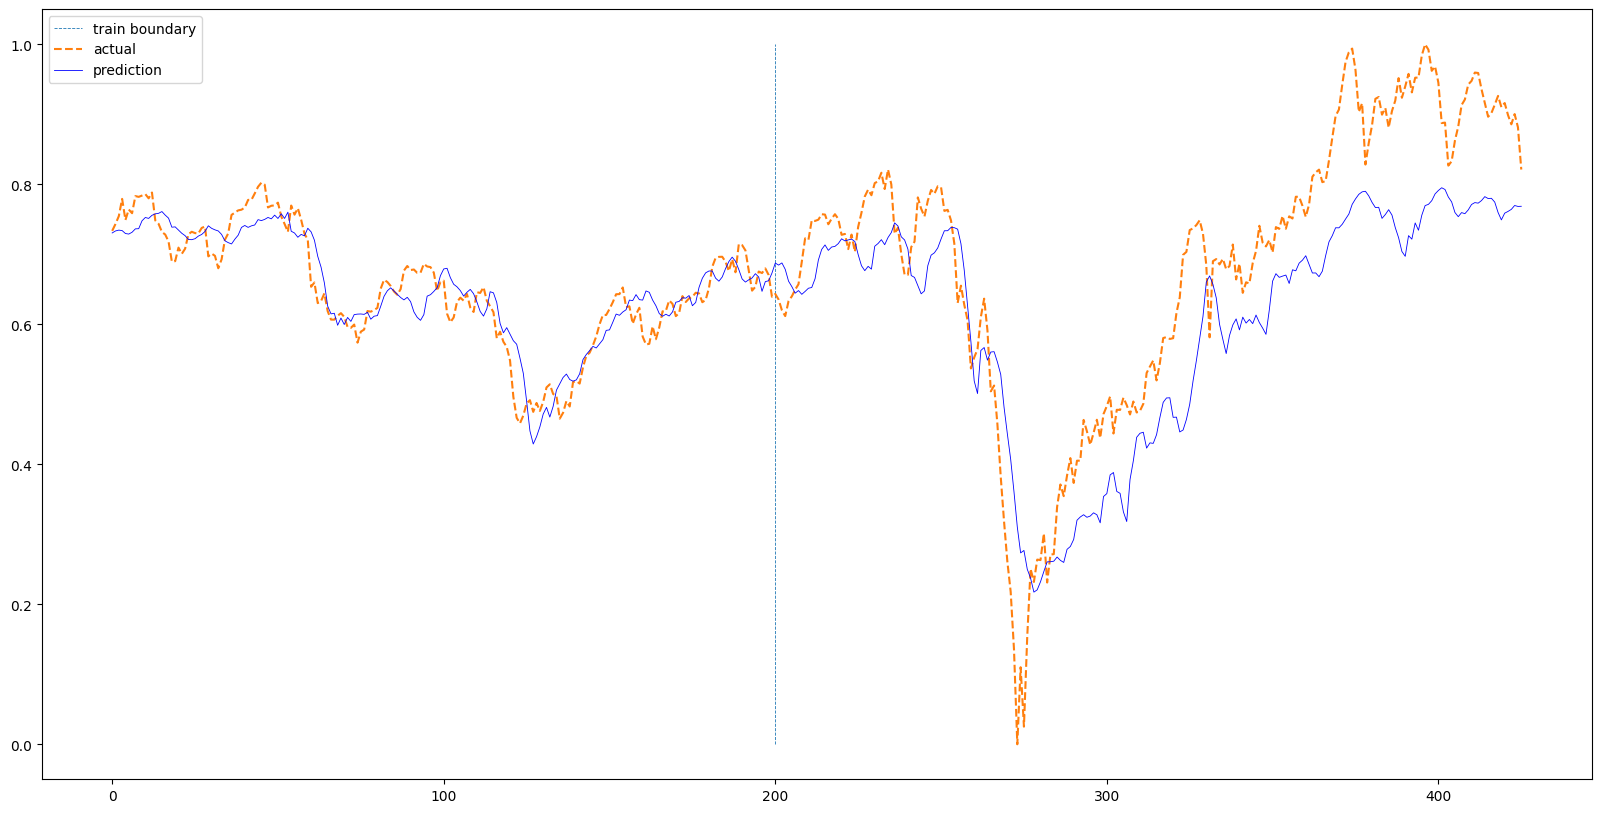

In [193]:
plt.figure(figsize=(20,10))
plt.plot(np.ones(100) * len(train), np.linspace(0, 1, 100), '--', linewidth=0.6)
plt.plot(df['Close'][sequence_length:].values,'--')
plt.plot(pred,'b', linewidth=0.6)
plt.legend(['train boundary','actual','prediction'])
plt.show()